<a href="https://colab.research.google.com/github/dustyattenborough/lectures-bigphys/blob/master/bigdataHW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:

import numpy as np
import matplotlib.pyplot as plt
from math import *
import random
import time
from google.colab import files
import os
import torch
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FixedLocator, FormatStrFormatter
import pandas as pd

In [6]:
def  dott(a,b):
  c=[a[0]-b[0],a[1]-b[1],a[2]-b[2] ]
  amag=a[0]**2+a[1]**2+a[2]**2
  bmag=b[0]**2+b[1]**2+b[2]**2
  cmag=c[0]**2+c[1]**2+c[2]**2
  cos0=(amag+bmag-cmag)/(2*sqrt(amag*bmag))
  return cos0

In [7]:
nExp=100000
datarnd=[]
R=2
nTrial=0
while True:
  x=random.uniform(-R,R)
  y=random.uniform(-R,R)
  z=random.uniform(-R,R)

  if x*x+y*y+z*z<R*R:
    datarnd.append([x,y,z])
    nTrial+=1
  if nTrial>=nExp:
    break
print(len(datarnd))

100000


In [8]:
#구좌표계로 랜덤

#R=2 # 구의 반지름
#nExp=100000
dataP3=[]
dataQ=[]
kq=10 ## charge density
vector=[3,0,0]
E_field=[]
rr=0
Q=0
dvector=[]
totalE=[[0,0,0]]
lislis=[0]

for i in range(nExp):
  lislis.append(i)
  r=random.random()*R
  theta=random.random()*pi
  phi=random.random()*2*pi
  dataP3.append([r*sin(theta)*cos(phi),r*sin(theta)*cos(phi),r*cos(theta)])
  dataQ.append(kq*r)
  #print(dataP3[i])
  rr=0
  for j in range(3):
    rr+=(dataP3[i][j]-vector[j])**2
  rr=sqrt(rr)
  dvector=[vector[0]-dataP3[i][0],vector[1]-dataP3[i][1],vector[2]-dataP3[i][2] ]
  Q=(dataQ[i]/rr**2)
  E_field.append([Q*dvector[0],Q*dvector[1],Q*dvector[2]] )
  #print(E_field[i])
  totalE.append([totalE[i][0]+E_field[i][0],totalE[i][1]+E_field[i][1],totalE[i][2]+E_field[i][2]]    )
print(totalE[nExp])

[291358.6585649624, -27984.18696748763, -630.8098972115785]


In [10]:
# xyz로 랜덤

#R=2 # 구의 반지름
#nExp=100000
dataP3=[]
dataQ=[]
kq=10 ## charge density
vector=[3,0,0]
E_field=[]
rr=0
Q=0
dvector=[]
totalE=[[0,0,0]]
lislis=[0]

for i in range(nExp):
  lislis.append(i)
  r=sqrt(datarnd[i][0]**2+datarnd[i][1]**2+datarnd[i][2]**2)
  dataP3.append([datarnd[i][0],datarnd[i][1],datarnd[i][2] ])
  dataQ.append(kq*r)
  #print(dataP3[i])
  rr=0
  for j in range(3):
    rr+=(dataP3[i][j]-vector[j])**2
  rr=sqrt(rr)
  dvector=[vector[0]-dataP3[i][0],vector[1]-dataP3[i][1],vector[2]-dataP3[i][2] ]
  Q=(dataQ[i]/rr**2)
  E_field.append([Q*dvector[0],Q*dvector[1],Q*dvector[2]] )
  #print(E_field[i])
  totalE.append([totalE[i][0]+E_field[i][0],totalE[i][1]+E_field[i][1],totalE[i][2]+E_field[i][2]]    )
print(totalE[nExp])

[446551.68059970706, 38.42229520430251, -94.02118391045661]


850
0.9989591230236978


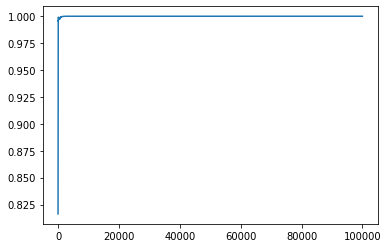

In [12]:
cos00=[]
lis0=[]
inti=0
for qq in range(nExp):
  cos00.append(dott(totalE[qq+1],vector))
  lis0.append(qq)
  if abs(cos00[qq]-1)>0.001:
    #print(inti)
    inti+=1
print(inti)
print(cos00[inti-1])
plt.plot(lis0,cos00)
plt.show()